# Introduction to pandas

- From http://www.datacarpentry.org/python-ecology-lesson/
- Download the data from http://www.datacarpentry.org/python-ecology-lesson/setup/

In [99]:
import pandas as pd
import numpy as np

In [7]:
surveys_df = pd.read_csv("data/surveys.csv")

## How to use the shell from jupyter notebooks

In [3]:
!pwd

/Users/thoelef/ecology-lesson


In [4]:
!ls -l

total 9360
drwxr-xr-x@ 12 thoelef  staff      408 Jan 24 10:35 data
-rw-r--r--@  1 thoelef  staff  4756820 Jan 24 11:35 data.zip
-rw-r--r--   1 thoelef  staff    30927 Jan 24 11:43 read_data.ipynb


In [8]:
#in windows:
# !dir

## Explore the data

In [10]:
type(surveys_df)

pandas.core.frame.DataFrame

In [12]:
surveys_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35549 entries, 0 to 35548
Data columns (total 9 columns):
record_id          35549 non-null int64
month              35549 non-null int64
day                35549 non-null int64
year               35549 non-null int64
plot_id            35549 non-null int64
species_id         34786 non-null object
sex                33038 non-null object
hindfoot_length    31438 non-null float64
weight             32283 non-null float64
dtypes: float64(2), int64(5), object(2)
memory usage: 2.4+ MB


In [13]:
surveys_df.columns

Index(['record_id', 'month', 'day', 'year', 'plot_id', 'species_id', 'sex',
       'hindfoot_length', 'weight'],
      dtype='object')

In [14]:
len(surveys_df)

35549

In [16]:
surveys_df.head(10)

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
5,6,7,16,1977,1,PF,M,14.0,NaN
6,7,7,16,1977,2,PE,F,NaN,NaN
7,8,7,16,1977,1,DM,M,37.0,NaN
8,9,7,16,1977,1,DM,F,34.0,NaN
9,10,7,16,1977,6,PF,F,20.0,NaN


In [17]:
surveys_df.tail()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN
35546,35547,12,31,2002,10,RM,F,15.0,14.0
35547,35548,12,31,2002,7,DO,M,36.0,51.0
35548,35549,12,31,2002,5,NaN,NaN,NaN,NaN


In [18]:
surveys_df.shape

(35549, 9)

In [19]:
surveys_df.len()

AttributeError: 'DataFrame' object has no attribute 'len'

# Statistics 

In [21]:
pd.unique( surveys_df["sex"] )

array(['M', 'F', nan], dtype=object)

In [22]:
pd.value_counts( surveys_df['sex'] )

M    17348
F    15690
Name: sex, dtype: int64

In [24]:
pd.unique(surveys_df["plot_id"])

array([ 2,  3,  7,  1,  6,  5,  8,  4, 11, 14, 15, 13,  9, 10, 17, 16, 20,
       23, 18, 21, 22, 19, 12, 24])

In [25]:
surveys_df["plot_id"].unique()

array([ 2,  3,  7,  1,  6,  5,  8,  4, 11, 14, 15, 13,  9, 10, 17, 16, 20,
       23, 18, 21, 22, 19, 12, 24])

In [28]:
plot_names = surveys_df.plot_id.unique()

In [29]:
len(plot_names)

24

In [30]:
surveys_df.plot_id.nunique()

24

In [31]:
surveys_df.species_id.nunique()

48

# Groups, aggregations

In [32]:
surveys_df.weight.mean()

42.672428212991356

In [33]:
surveys_df.weight.std()

36.63125947458399

In [34]:
surveys_df.weight.count()

32283

In [35]:
surveys_df.weight.describe()

count    32283.000000
mean        42.672428
std         36.631259
min          4.000000
25%         20.000000
50%         37.000000
75%         48.000000
max        280.000000
Name: weight, dtype: float64

In [36]:
surveys_df.describe()

,record_id,month,day,year,plot_id,hindfoot_length,weight
count,35549.000000,35549.000000,35549.000000,35549.000000,35549.000000,31438.000000,32283.000000
mean,17775.000000,6.474022,16.105966,1990.475231,11.397001,29.287932,42.672428
std,10262.256696,3.396583,8.256691,7.493355,6.799406,9.564759,36.631259
min,1.000000,1.000000,1.000000,1977.000000,1.000000,2.000000,4.000000
25%,8888.000000,4.000000,9.000000,1984.000000,5.000000,21.000000,20.000000
50%,17775.000000,6.000000,16.000000,1990.000000,11.000000,32.000000,37.000000
75%,26662.000000,9.000000,23.000000,1997.000000,17.000000,36.000000,48.000000
max,35549.000000,12.000000,31.000000,2002.000000,24.000000,70.000000,280.000000


In [38]:
grouped_data = surveys_df.groupby("sex")

In [40]:
grouped_data["weight"].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
F,15303.0,42.170555,36.847958,4.0,20.0,34.0,46.0,274.0
M,16879.0,42.995379,36.184981,4.0,20.0,39.0,49.0,280.0


In [41]:
grouped_data['weight'].mean()

sex
F    42.170555
M    42.995379
Name: weight, dtype: float64

In [43]:
surveys_df.groupby(["sex", "species_id"]).mean()

record_id      month        day         year    plot_id  \
sex species_id                                                               
F   BA          18658.451613   6.387097  13.419355  1990.870968  10.903226   
    DM          15448.699605   6.403382  16.320817  1988.787879  11.047431   
    DO          17035.387615   6.071101  15.567278  1989.943425   8.229358   
    DS           6015.080808   6.536195  15.235690  1981.818182  10.867845   
    NL          14693.844444   6.863704  16.647407  1988.099259  12.632593   
    OL          10934.692632   6.284211  15.934737  1985.503158   9.816842   
    OT          20190.142857   7.218543  16.578997  1992.170293  11.168401   
    OX            137.250000   8.500000  15.500000  1977.000000  10.250000   
    PB          31631.981166   7.361482  15.818955  2000.264277  13.230863   
    PE          16256.756477   6.407599  15.552677  1989.284974  13.025907   
    PF          18019.494055   6.924703  16.523118  1990.985469  13.367239   
    PH          16552.571429   6.380952  17.809524  1989.428571  16.666667   
    PL          25629.000000   5.937500  17.937500  1996.750000  15.125000   
    PM          20084.845550   6.164921  17.303665  1992.321990  14.238220   
    PP          24701.294776   7.018035  16.427861  1995.613806  10.120647   
    PX          24991.000000   2.000000   8.000000  1997.000000  23.000000   
    RF          16234.736842   5.333333  11.087719  1989.175439  13.684211   
    RM          16235.573812   5.735613  14.974145  1989.367807  13.478732   
    RO          30831.250000   8.250000  20.250000  1999.250000  11.250000   
    SF          19949.117647   6.647059  15.705882  1991.705882  14.588235   
    SH          17526.833333   5.717949  12.512821  1990.141026  11.525641   
    SO          20524.531250   6.812500  11.781250  1992.406250   7.125000   
    SS           4875.000000  10.000000  24.000000  1981.000000  20.000000   
M   AH          22330.000000   6.000000   8.000000  1995.000000  16.000000   
    BA          18385.857143   8.214286  11.642857  1990.500000  10.214286   
    DM          16071.827944   6.288658  16.164517  1989.285642  10.785726   
    DO          18670.820738   6.137083  16.019332  1991.135911   8.218512   
    DS           6151.857480   6.210236  15.746457  1982.003150  10.414173   
    NL          13648.402390   6.962151  17.053785  1987.370518  10.958167   
    OL          11484.576172   6.623047  15.773438  1985.849609  10.066406   
    OT          20035.259516   7.231834  16.355536  1992.029412  10.815744   
    OX           6492.200000   7.800000  14.600000  1981.800000  13.600000   
    PB          31143.734375   7.195724  16.372533  1999.990132  12.310033   
    PE          15652.796562   6.348138  16.363897  1988.846705  13.047278   
    PF          16950.351716   6.243873  17.191176  1990.227941  12.926471   
    PH          15123.545455   7.454545  13.545455  1988.454545  14.454545   
    PI          32480.875000   7.375000  15.625000  2000.875000   7.125000   
    PL          26521.157895   6.105263  18.736842  1997.210526  14.526316   
    PM          18880.964072   6.489022  18.223553  1991.365269  13.928144   
    PP          25984.515668   6.716621  16.170981  1996.545640  10.337875   
    PX          25137.000000   2.000000   9.000000  1997.000000  13.000000   
    RF          14791.222222   5.166667  10.555556  1988.166667   9.833333   
    RM          16628.435137   5.339511  15.240178  1989.716086  13.943662   
    RO          34222.500000   5.750000  15.250000  2002.000000  12.000000   
    RX          23703.500000   3.000000  19.500000  1996.000000   7.000000   
    SF          20942.913043   5.739130  17.913043  1992.478261  15.869565   
    SH          21446.738462   6.323077  12.784615  1992.938462  10.753846   
    SO          20263.000000   6.363636  15.909091  1992.272727   8.545455   
    SS          10465.000000   5.000000   7.000000  1985.000000  11.500000   

                hindfoot_length      wei

In [45]:
surveys_df.groupby("plot_id")['weight'].mean()

plot_id
1     51.822911
2     52.251688
3     32.654386
4     47.928189
5     40.947802
6     36.738893
7     20.663009
8     47.758001
9     51.432358
10    18.541219
11    43.451757
12    49.496169
13    40.445660
14    46.277199
15    27.042578
16    24.585417
17    47.889593
18    40.005922
19    21.105166
20    48.665303
21    24.627794
22    54.146379
23    19.634146
24    43.679167
Name: weight, dtype: float64

# Quick plot

In [49]:
%matplotlib inline

In [46]:
species_count = surveys_df.groupby("species_id")["record_id"].count()

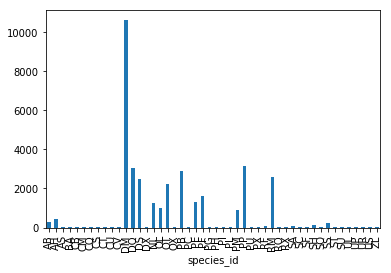

In [51]:
species_count.plot(kind="bar")

# groupby

In [53]:
surveys_df.groupby("sex").mean()

,record_id,month,day,year,plot_id,hindfoot_length,weight
sex,,,,,,,
F,18036.412046,6.583047,16.007138,1990.644997,11.440854,28.836780,42.170555
M,17754.835601,6.392668,16.184286,1990.480401,11.098282,29.709578,42.995379


In [55]:
surveys_df.groupby(["sex", "plot_id"]).mean()

record_id     month        day         year  hindfoot_length  \
sex plot_id                                                                    
F   1        18390.384434  6.597877  15.338443  1990.933962        31.733911   
    2        17714.753608  6.426804  16.288660  1990.449485        30.161220   
    3        19888.783875  6.604703  16.161254  1992.013438        23.774044   
    4        17489.205275  6.442661  15.746560  1990.235092        33.249102   
    5        12280.793169  6.142315  15.722960  1986.485769        28.921844   
    6        19406.503392  6.628223  16.313433  1991.579376        26.981322   
    7        19069.668657  6.385075  15.313433  1991.441791        19.779553   
    8        18920.276190  6.632143  15.836905  1991.267857        32.187578   
    9        16217.497069  6.499414  15.555686  1989.303634        35.126092   
    10       16001.496454  5.588652  16.964539  1989.248227        18.641791   
    11       16994.962287  6.759124  16.283455  1989.836983        32.029299   
    12       17457.966981  6.509434  16.305660  1990.266981        30.975124   
    13       18033.100318  6.802548  16.229299  1990.619427        27.201014   
    14       17097.145275  6.510578  16.681241  1989.974612        32.973373   
    15       20602.449064  6.569647  16.162162  1992.523909        21.949891   
    16       19002.445946  6.360360  16.819820  1991.351351        23.144928   
    17       18234.322870  6.650224  15.892377  1990.785874        30.918536   
    18       17940.875497  6.698013  15.960265  1990.536424        26.690341   
    19       21848.216475  6.701149  15.226054  1993.417625        21.257937   
    20       17510.769231  6.743077  16.026154  1990.253846        27.069193   
    21       22452.636661  6.860884  16.307692  1993.878887        22.366554   
    22       18499.695976  6.651267  15.521610  1990.973174        34.108320   
    23       15863.193939  6.860606  16.036364  1989.024242        20.051948   
    24       13702.224280  6.596708  16.393004  1987.485597        26.993377   
M   1        17197.740639  6.121461  15.905936  1990.091324        34.302770   
    2        18085.458042  6.340035  15.440559  1990.756119        30.353760   
    3        20226.767857  6.271429  16.450000  1992.275000        23.833744   
    4        18493.841748  6.430097  16.507767  1991.000971        34.097959   
    5        12798.426621  6.194539  15.703072  1986.817406        29.694794   
    6        17849.574607  6.035340  16.091623  1990.556283        27.425591   
    7        19188.729642  6.719870  15.778502  1991.462541        20.536667   
    8        19452.109868  6.571719  15.854527  1991.686673        33.751059   
    9        18000.710159  6.361554  15.209163  1990.632470        34.175732   
    10       15708.704225  5.718310  16.739437  1989.007042        19.567164   
    11       16933.909621  6.374150  15.974733  1989.856171        32.078014   
    12       17592.327500  6.304167  16.367500  1990.400833        31.762489   
    13       16969.044700  6.480204  16.005109  1989.911877        27.893793   
    14       17891.948598  6.660748  16.504673  1990.587850        32.961802   
    15       18104.019560  6.185819  17.413203  1990.770171        21.803109   
    16       18434.714286  6.201465  16.622711  1990.926740        23.480916   
    17       18857.651472  6.569801  16.183286  1991.331434        32.227634   
    18       15106.718850  6.610224  16.797125  1988.551118        27.703072   
    19       19470.779690  6.533563  16.647160  1991.740103        21.071685   
    20       16076.192496  6.489396  16.375204  1989.243067        27.908451   
    21       20120.399113  6.671840  16.203991  1992.199557        21.736721   
    22       18015.365527  6.381872  16.682021  1990.650817        33.359746   
    23       17091.338164  6.391304  16.077295  1989.961353        19.850000   
    24       15208.136082  6.360825  16.971134  1988.641237        25.786996   

               

In [56]:
surveys_df.groupby(["sex"]).mean()

,record_id,month,day,year,plot_id,hindfoot_length,weight
sex,,,,,,,
F,18036.412046,6.583047,16.007138,1990.644997,11.440854,28.836780,42.170555
M,17754.835601,6.392668,16.184286,1990.480401,11.098282,29.709578,42.995379



# Plotting unwrapped

In [57]:
grouped_by_species_id = surveys_df.groupby("species_id")

In [59]:
grouped_by_species_id.record_id

In [61]:
grouped_by_species_id_record_column = grouped_by_species_id["record_id"]

In [63]:
species_count = grouped_by_species_id_record_column.count()

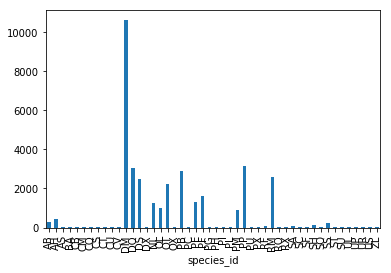

In [64]:
species_count.plot(kind="bar")

# subsets

In [70]:
surveys_df.loc[0:4]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN


In [71]:
surveys_df.iloc[0:4]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN


In [75]:
surveys_df[['plot_id', 'species_id']].loc[0:4]

,plot_id,species_id
0,2,NL
1,3,NL
2,2,DM
3,7,DM
4,3,DM


In [77]:
columns_list = ["plot_id", "species_id"]
surveys_df[  columns_list   ]

,plot_id,species_id
0,2,NL
1,3,NL
2,2,DM
3,7,DM
4,3,DM
5,1,PF
6,2,PE
7,1,DM
8,1,DM
9,6,PF


In [78]:
surveys_df.head()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN


In [89]:
surveys_df.hindfoot_length  > 35

0        False
1        False
2         True
3         True
4        False
5        False
6        False
7         True
8        False
9        False
10        True
11        True
12       False
13       False
14        True
15        True
16        True
17       False
18       False
19        True
20       False
21       False
22        True
23       False
24       False
25       False
26        True
27        True
28       False
29        True
         ...  
35519    False
35520     True
35521    False
35522     True
35523    False
35524    False
35525    False
35526    False
35527    False
35528    False
35529    False
35530    False
35531    False
35532     True
35533     True
35534     True
35535    False
35536     True
35537    False
35538    False
35539    False
35540    False
35541    False
35542    False
35543    False
35544    False
35545    False
35546    False
35547     True
35548    False
Name: hindfoot_length, Length: 35549, dtype: bool

In [80]:
observations_gt_35 = surveys_df.hindfoot_length  > 35

In [81]:
surveys_df[observations_gt_35]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
7,8,7,16,1977,1,DM,M,37.0,NaN
10,11,7,16,1977,5,DS,F,53.0,NaN
11,12,7,16,1977,7,DM,M,38.0,NaN
14,15,7,16,1977,6,DM,F,36.0,NaN
15,16,7,16,1977,4,DM,F,36.0,NaN
16,17,7,16,1977,3,DS,F,48.0,NaN
19,20,7,17,1977,11,DS,F,48.0,NaN
22,23,7,17,1977,13,DM,M,36.0,NaN


In [87]:
male_plot_1 = surveys_df[(surveys_df.plot_id == 1) & (surveys_df['sex'] == "M")]

In [88]:
male_plot_1.groupby("species_id")['weight'].mean()

species_id
BA      7.000000
DM     44.262295
DO     49.813620
DS    133.431655
NL    166.575758
OL     34.833333
OT     23.163265
PB     35.391304
PE     20.000000
PF      7.052632
PH     42.000000
PM     22.500000
PP     17.000000
RM     10.090909
RO      8.000000
Name: weight, dtype: float64

# operating on columns

In [92]:
surveys_df["weight_in_kg"] = surveys_df.weight * 2.2

In [93]:
surveys_df.tail(10)

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,weight_in_kg
35539,35540,12,31,2002,15,PB,F,26.0,23.0,50.6
35540,35541,12,31,2002,15,PB,F,24.0,31.0,68.2
35541,35542,12,31,2002,15,PB,F,26.0,29.0,63.8
35542,35543,12,31,2002,15,PB,F,27.0,34.0,74.8
35543,35544,12,31,2002,15,US,NaN,NaN,NaN,NaN
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN,NaN
35546,35547,12,31,2002,10,RM,F,15.0,14.0,30.8
35547,35548,12,31,2002,7,DO,M,36.0,51.0,112.2
35548,35549,12,31,2002,5,NaN,NaN,NaN,NaN,NaN


### Needs "import numpy as np"

In [100]:
def categorize_weight(weight):
    if pd.isnull(weight):
        return np.nan
    
    if weight < 20:
        return "light"
    elif weight > 40:
        return "heavy"
    else:
        return "medium"

In [102]:
surveys_df["weight_classification"] = surveys_df.weight.apply(categorize_weight)

In [103]:
surveys_df.tail(10)

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,weight_in_kg,weight_classification
35539,35540,12,31,2002,15,PB,F,26.0,23.0,50.6,medium
35540,35541,12,31,2002,15,PB,F,24.0,31.0,68.2,medium
35541,35542,12,31,2002,15,PB,F,26.0,29.0,63.8,medium
35542,35543,12,31,2002,15,PB,F,27.0,34.0,74.8,medium
35543,35544,12,31,2002,15,US,NaN,NaN,NaN,NaN,NaN
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN,NaN,NaN
35546,35547,12,31,2002,10,RM,F,15.0,14.0,30.8,light
35547,35548,12,31,2002,7,DO,M,36.0,51.0,112.2,heavy
35548,35549,12,31,2002,5,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
surveys_df.groupby("weight_classification")['record_id'].count()

weight_classification
heavy     13937
light      7604
medium    10742
Name: record_id, dtype: int64

In [ ]:
surveys_df.apply()

# Merging dataframes

In [106]:
surveys_df.head(5)

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,weight_in_kg,weight_classification
0,1,7,16,1977,2,NL,M,32.0,NaN,NaN,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN,NaN,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN,NaN,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN,NaN,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN,NaN,NaN


In [108]:
species_df = pd.read_csv("data/species.csv")

In [111]:
?pd.merge()

In [113]:
merged_df = pd.merge(surveys_df, species_df, on="species_id", how="left")

In [116]:
taxa_plot_count = merged_df.groupby(["taxa", "plot_id"])['record_id'].count()

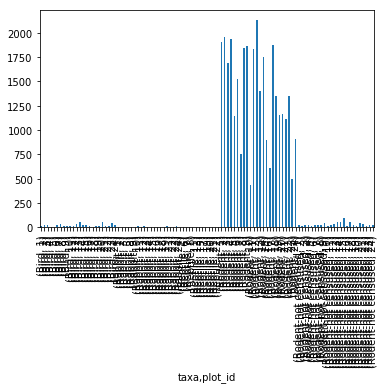

In [119]:
taxa_plot_count.plot(kind="bar")

In [120]:
merged_df.to_excel("merged_dataframe.xls")